## Classification

## LogisticRegression | RandomForest | DecisionTree | Support Vector Machines

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder



In [2]:
# Load the datasets
train_data = pd.read_csv('C:/Zintern/python/Algoritms/classification/titanic/train.csv')
test_data = pd.read_csv('C:/Zintern/python/Algoritms/classification/titanic/test.csv')



In [3]:
# Preprocess the data
def preprocess_data(df):
    # Fill missing values
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    
    # Drop the 'Cabin' column
    df = df.drop(columns=['Cabin'])
    
    # Encode categorical variables
    label_encoder = LabelEncoder()
    df['Sex'] = label_encoder.fit_transform(df['Sex'])
    df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
    return df



In [4]:
# Preprocess the datasets
train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)



In [5]:
# Split the data into features and target labels
X_train = train_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
y_train = train_data['Survived']
X_test = test_data.drop(columns=['PassengerId', 'Name', 'Ticket'])



In [6]:
# List of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC()
}



In [7]:
# Function to evaluate models and get their accuracy
def evaluate_models(models, X, y):
    accuracies = {}
    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=5)
        accuracies[name] = scores.mean()
        print(f'{name} Accuracy: {scores.mean():.4f}')
    return accuracies



In [8]:
# Evaluate the models
accuracies = evaluate_models(models, X_train, y_train)




Logistic Regression Accuracy: 0.7868
Random Forest Accuracy: 0.8081
Decision Tree Accuracy: 0.7711
SVM Accuracy: 0.6757


In [9]:
# Find the model with the highest accuracy
best_model_name = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model_name]
print(f'Best Model: {best_model_name} with accuracy {best_accuracy:.4f}')



Best Model: Random Forest with accuracy 0.8081


In [10]:
# Cross-validate in case of ties
tie_models = [name for name, accuracy in accuracies.items() if accuracy == best_accuracy]
if len(tie_models) > 1:
    print("Tie detected, cross-validating tied models...")
    best_model_name = None
    best_accuracy = 0
    for name in tie_models:
        scores = cross_val_score(models[name], X_train, y_train, cv=10)
        mean_score = scores.mean()
        if mean_score > best_accuracy:
            best_model_name = name
            best_accuracy = mean_score
    print(f'Best Model after cross-validation: {best_model_name} with accuracy {best_accuracy:.4f}')



In [11]:
# Train the best model on the full training data
best_model = models[best_model_name]
best_model.fit(X_train, y_train)



RandomForestClassifier()

In [12]:
# Predict on the test set
test_predictions = best_model.predict(X_test)



In [13]:
# Create a DataFrame for submission
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_predictions
})



In [14]:
# Save the submission to a CSV file
submission.to_csv('titanic_submission.csv', index=False)
print("Predictions saved to 'titanic_submission.csv'.")



Predictions saved to 'titanic_submission.csv'.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_8928\2550297359.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=train_data, ci=None)


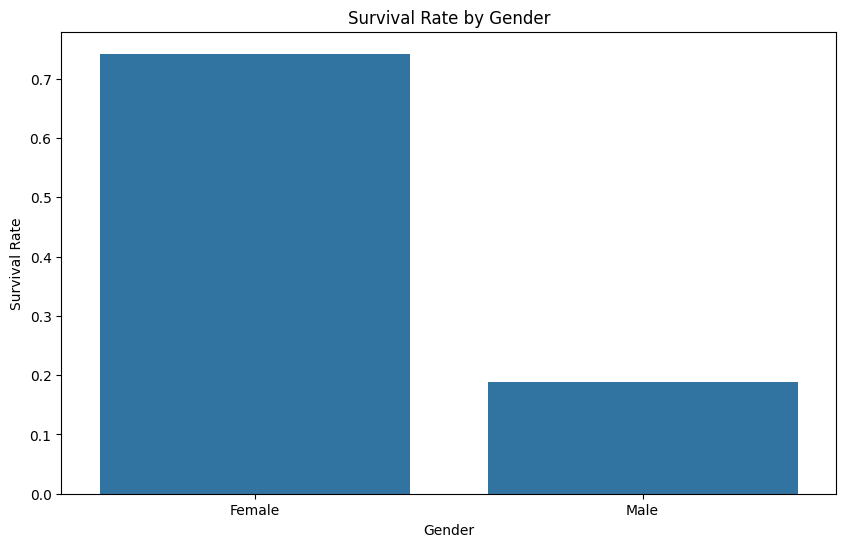

In [15]:
# Visualizations
# 1. Survival Rate by Gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=train_data, ci=None)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.show()



C:\Users\Administrator\AppData\Local\Temp\ipykernel_8928\3085783607.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=train_data, ci=None)


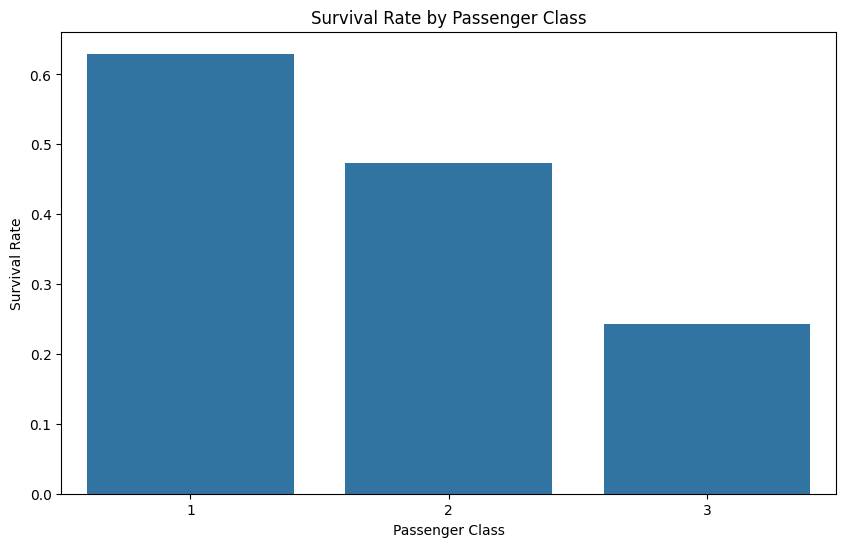

In [16]:
# 2. Survival Rate by Passenger Class
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=train_data, ci=None)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show()



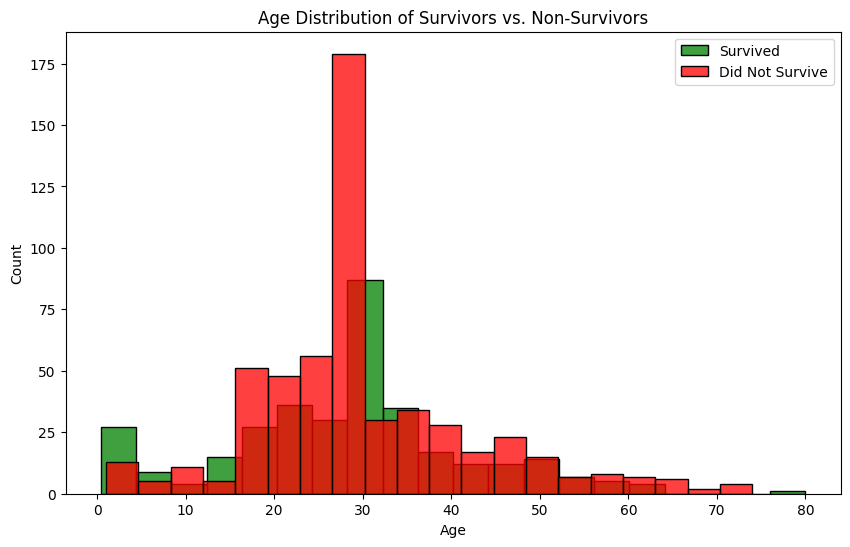

In [17]:
# 3. Age Distribution of Survivors vs. Non-Survivors
plt.figure(figsize=(10, 6))
sns.histplot(train_data[train_data['Survived'] == 1]['Age'], bins=20, kde=False, color='green', label='Survived')
sns.histplot(train_data[train_data['Survived'] == 0]['Age'], bins=20, kde=False, color='red', label='Did Not Survive')
plt.title('Age Distribution of Survivors vs. Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()



C:\Users\Administrator\AppData\Local\Temp\ipykernel_8928\2722955811.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=train_data, ci=None)


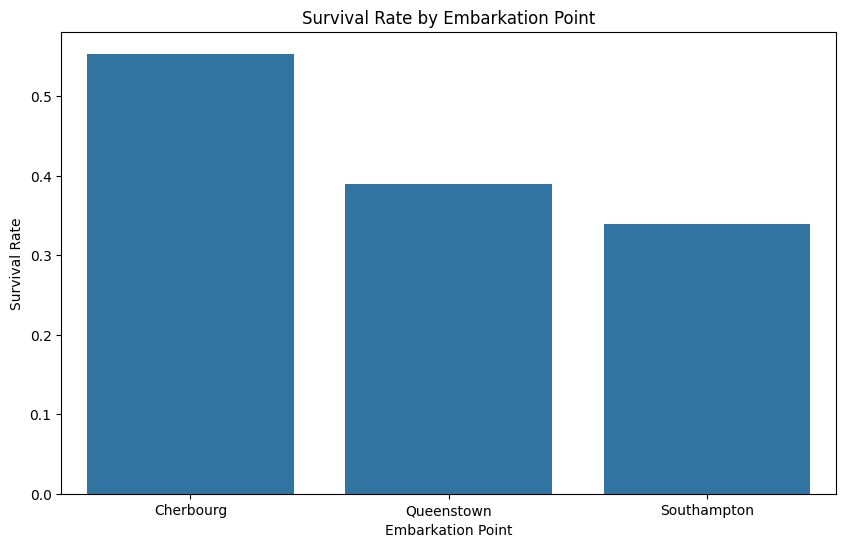

In [18]:
# 4. Survival Rate by Embarkation Point
plt.figure(figsize=(10, 6))
sns.barplot(x='Embarked', y='Survived', data=train_data, ci=None)
plt.xticks(ticks=[0, 1, 2], labels=['Cherbourg', 'Queenstown', 'Southampton'])
plt.title('Survival Rate by Embarkation Point')
plt.ylabel('Survival Rate')
plt.xlabel('Embarkation Point')
plt.show()



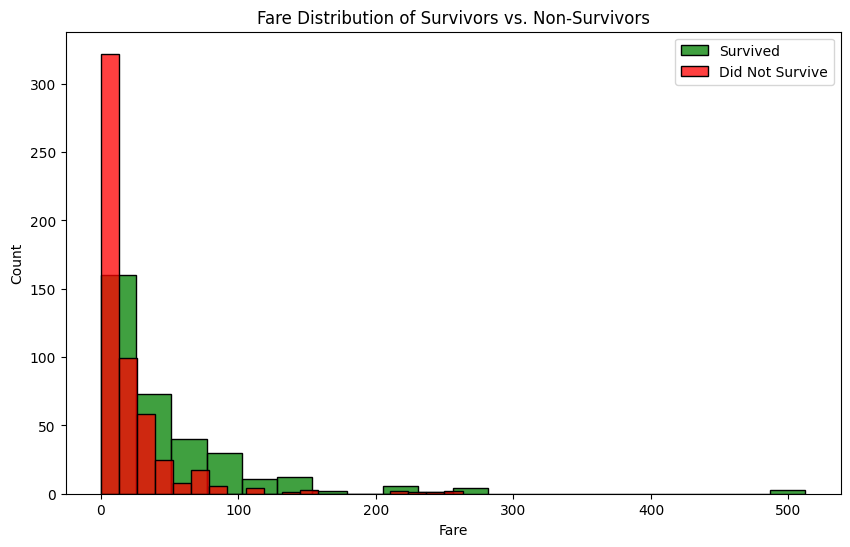

In [19]:
# 5. Fare Distribution of Survivors vs. Non-Survivors
plt.figure(figsize=(10, 6))
sns.histplot(train_data[train_data['Survived'] == 1]['Fare'], bins=20, kde=False, color='green', label='Survived')
sns.histplot(train_data[train_data['Survived'] == 0]['Fare'], bins=20, kde=False, color='red', label='Did Not Survive')
plt.title('Fare Distribution of Survivors vs. Non-Survivors')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend()
plt.show()